In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
# Create a model calss that inherits nn.module

class Model(nn.Module):
    # Input layer(4 features of flower) --> hidden layer1( number of neurons ) --> H2(n) --> output(3 types of flowers)
    def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
        super().__init__() # Instanciate the NN module
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.out(x))

        return x

In [4]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import pandas as pd

In [7]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [8]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [9]:
# Change last column from string to int
my_df['variety'] = my_df['variety'].replace('Setosa',0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor',1.0)
my_df['variety'] = my_df['variety'].replace('Virginica',2.0)

C:\Users\Ryanu\AppData\Local\Temp\ipykernel_35184\4200526655.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica',2.0)


In [10]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [11]:
# Train Test Split Set X,Y

X = my_df.drop('variety',axis=1)
Y = my_df['variety']

In [12]:
# Convert to numpy array

X = X.values
Y = Y.values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=41)

In [15]:
# Convert X features to float tensors

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [16]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [17]:
# Set criterion of model to measure the error, how far off the predictions are from the data

criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate(if eror doesn't go down after a bunch of iteratinos (epochs),lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [18]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [19]:
# Train our model
# Determine our epochs (one run thru all the training data in our network)
epochs = 100
losses = []

for i in range(epochs):
    # Go Forward and get a prediction
    y_pred = model.forward(X_train) # get predicted results

    #Measure loss/error going to be high at first
    loss = criterion(y_pred,y_train) # Pred values vs Y_train

    #Keep traick of losses
    losses.append(loss.detach().numpy())

    # Print every 10 epoch
    if i % 10 ==0:
        print(f'Epoch : {i}, Loss : {loss}')

    # Do some back propagation : take the error rate of forward propagation and geed it back thru the network to fine tune the weights
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch : 0, Loss : 1.125203251838684
Epoch : 10, Loss : 1.0097211599349976
Epoch : 20, Loss : 0.8516880869865417
Epoch : 30, Loss : 0.6555684804916382
Epoch : 40, Loss : 0.45029523968696594
Epoch : 50, Loss : 0.27184727787971497
Epoch : 60, Loss : 0.15538781881332397
Epoch : 70, Loss : 0.0933627262711525
Epoch : 80, Loss : 0.06463462114334106
Epoch : 90, Loss : 0.05066271498799324


Text(0.5, 0, 'Epoch')

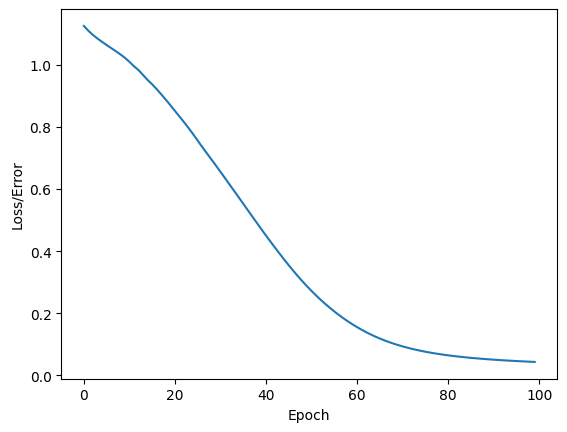

In [20]:
# Graph it out
plt.plot(range(epochs),losses)
plt.ylabel("Loss/Error")
plt.xlabel("Epoch")

In [21]:
# Evaluate Model on Test Data Set (validate mdoel on test set)
with torch.no_grad(): # Basically turn off back propagation so model does not learn
    y_eval = model.forward(X_test) # X_test are features from our test_set, y_eval will be
    loss = criterion(y_eval,y_test) # Find Loss or Error

loss

tensor(0.1295)

In [25]:
correct = 0

with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        # will tell us what type of flower class our network thinks it is
        print(f"{i+1}. {str(y_val)}\t{y_test[i]} \t {y_val.argmax().item()}")

        # Correct or not
        if y_val.argmax().item() == y_test[i]:
            correct +=1
print(f"We got {correct} Correct")

1. tensor([0.0000, 7.4447, 9.9152])	2 	 2
2. tensor([ 0.0000,  7.7042, 14.3743])	2 	 2
3. tensor([ 0.0000,  9.1280, 15.1753])	2 	 2
4. tensor([0.2102, 8.3280, 4.5364])	1 	 1
5. tensor([ 0.0000,  8.4035, 12.4779])	2 	 2
6. tensor([1.6255, 8.0527, 1.9799])	1 	 1
7. tensor([0.0000, 8.0659, 9.2757])	2 	 2
8. tensor([0.3294, 8.4105, 4.3070])	1 	 1
9. tensor([ 0.0000,  8.2367, 10.8423])	2 	 2
10. tensor([ 0.0000,  8.1941, 15.2505])	2 	 2
11. tensor([0.0000, 7.9806, 8.7350])	2 	 2
12. tensor([8.9715, 3.4637, 0.0000])	0 	 0
13. tensor([8.0554, 3.1741, 0.0000])	0 	 0
14. tensor([2.2377, 6.4805, 0.4353])	1 	 1
15. tensor([8.0202, 3.9148, 0.0000])	0 	 0
16. tensor([0.0000, 8.1254, 8.0101])	2 	 1
17. tensor([8.3626, 3.3009, 0.0000])	0 	 0
18. tensor([0.0000, 7.6349, 9.5548])	1 	 2
19. tensor([8.9383, 3.4532, 0.0000])	0 	 0
20. tensor([7.5003, 3.3025, 0.0000])	0 	 0
21. tensor([1.9760, 7.0980, 1.0766])	1 	 1
22. tensor([ 0.0000,  8.4465, 14.0281])	2 	 2
23. tensor([8.1228, 3.8523, 0.0000])	0 	 0
24

In [26]:
# highest number here is what our network thinks the flower is

In [27]:
# How to test a new data point with model

new_iris = torch.tensor([4.7,3.2,1.3,0.1])

In [28]:
with torch.no_grad():
    print(model(new_iris))

tensor([8.5531, 3.3314, 0.0000])


In [30]:
newer_iris = torch.tensor([5.9,3.0,5.1,1.8])

with torch.no_grad():
    print(model(newer_iris))

tensor([ 0.0000,  7.5979, 10.1487])


In [31]:
# Save our NN Model

torch.save(model.state_dict(),'iris_nn_model.pt')

In [32]:
# Load the movel

new_model = Model()
new_model.load_state_dict(torch.load('iris_nn_model.pt'))

C:\Users\Ryanu\AppData\Local\Temp\ipykernel_35184\3278098716.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('iris_nn_model.pt'))


<All keys matched successfully>

In [33]:
# Make sure it is loaded correctly

new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)